In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [118]:
checkpointDir = "./checkpoint"
train_1k6_label_log = os.path.join(checkpointDir, "run3", "train_1k6_label.log")
train_1k6label_29k_unlabel_log = os.path.join(checkpointDir, "run7", "train_1k6label_29kunlabel.log")
train_1k6label_focalloss_log = os.path.join(checkpointDir, "run6", "train_1k6label_focalloss.log")

train_1klabel_29k_unlabel_log = os.path.join(checkpointDir, "run4", "train_unlabel.log")
train_1k_label_focalloss_log = os.path.join(checkpointDir, "run9", "train_focalloss.log")
train_1k_label_log = os.path.join(checkpointDir, "run2", "train.log")

train_3klabel_log = os.path.join(checkpointDir, "run5", "train_3k_label_base.log")
train_3klabel_29kunlabel_log = os.path.join(checkpointDir, "run8", "train_3klabel_29kunlabel.log")
train_3klabel_focalloss_log = os.path.join(checkpointDir, "focalloss", "run9", "train_3klabel_focalloss.log")

In [119]:
def get_trainval_detail_for_log(logpath):
    f = open(logpath, "r")
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    for line in f.readlines():
        line = line.strip()
        if "Acc" not in line:
            continue
        items = line.split(" ")
        train_loss_list.append(float(items[4]))
        train_acc_list.append(float(items[7]))
        val_loss_list.append(float(items[-4]))
        val_acc_list.append(float(items[-1]))
    f.close()
    return train_loss_list, val_loss_list, train_acc_list, val_acc_list

In [120]:
def plot_result(log_path):
    train_loss_list, val_loss_list, train_acc_list, val_acc_list = get_trainval_detail_for_log(log_path)
    showstr = "best train acc:{:.2f}%, best test acc:{:.2f}%".format(max(train_acc_list)*100, max(val_acc_list)*100)
    print(showstr)
    curworks = log_path.split(os.sep)
    curworkdir = os.path.join(checkpointDir,curworks[-2])
    plt.figure(figsize=(10,3),dpi=200)
    plt.suptitle(showstr)
    plt.subplot(1,2,1)
    epoch_x = list(range(100))
    plt.plot(epoch_x, train_loss_list, epoch_x, val_loss_list)
    plt.legend(["train loss", "test loss"])
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.subplot(1,2,2)
    epoch_x = list(range(100))
    plt.plot(epoch_x, train_acc_list, epoch_x, val_acc_list)
    plt.legend(["train acc", "test acc"])
    plt.ylabel("acc")
    plt.xlabel("epoch")
    plt.savefig(os.path.join(curworkdir, "acc and loss.jpg"))

In [121]:
def plot_result_compare(base_log, focal_log, unlabel_log):
    plt.figure(figsize=(13,8),dpi=300)
    train_loss_list, val_loss_list, train_acc_list, val_acc_list = get_trainval_detail_for_log(base_log)
    focal_train_loss_list, focal_val_loss_list, focal_train_acc_list, focal_val_acc_list = get_trainval_detail_for_log(focal_log)
    unlabel_train_loss_list, unlabel_val_loss_list, unlabel_train_acc_list, unlabel_val_acc_list = get_trainval_detail_for_log(unlabel_log)
    epoch_x = list(range(100))
    plt.subplot(2,2,1)
    plt.plot(epoch_x, train_loss_list,
             epoch_x, focal_train_loss_list,
             epoch_x, unlabel_train_loss_list)
    plt.ylabel("train loss")
    plt.xlabel("epoch")
    plt.legend(["base", "focal", "mixlabel"])
    plt.subplot(2,2,2)
    plt.plot(epoch_x, train_acc_list,
             epoch_x, focal_train_acc_list,
             epoch_x, unlabel_train_acc_list)
    plt.ylabel("train acc")
    plt.xlabel("epoch")
    plt.legend(["base", "focal", "mixlabel"])
    plt.subplot(2,2,3)
    plt.plot(epoch_x, val_loss_list,
             epoch_x, focal_val_loss_list,
             epoch_x, unlabel_val_loss_list)
    plt.ylabel("test loss")
    plt.xlabel("epoch")
    plt.legend(["base", "focal", "mixlabel"])
    plt.subplot(2,2,4)
    plt.plot(epoch_x, val_acc_list,
             epoch_x, focal_val_acc_list,
             epoch_x, unlabel_val_acc_list)
    plt.ylabel("test acc")
    plt.xlabel("epoch")
    plt.legend(["base", "focal", "mixlabel"])

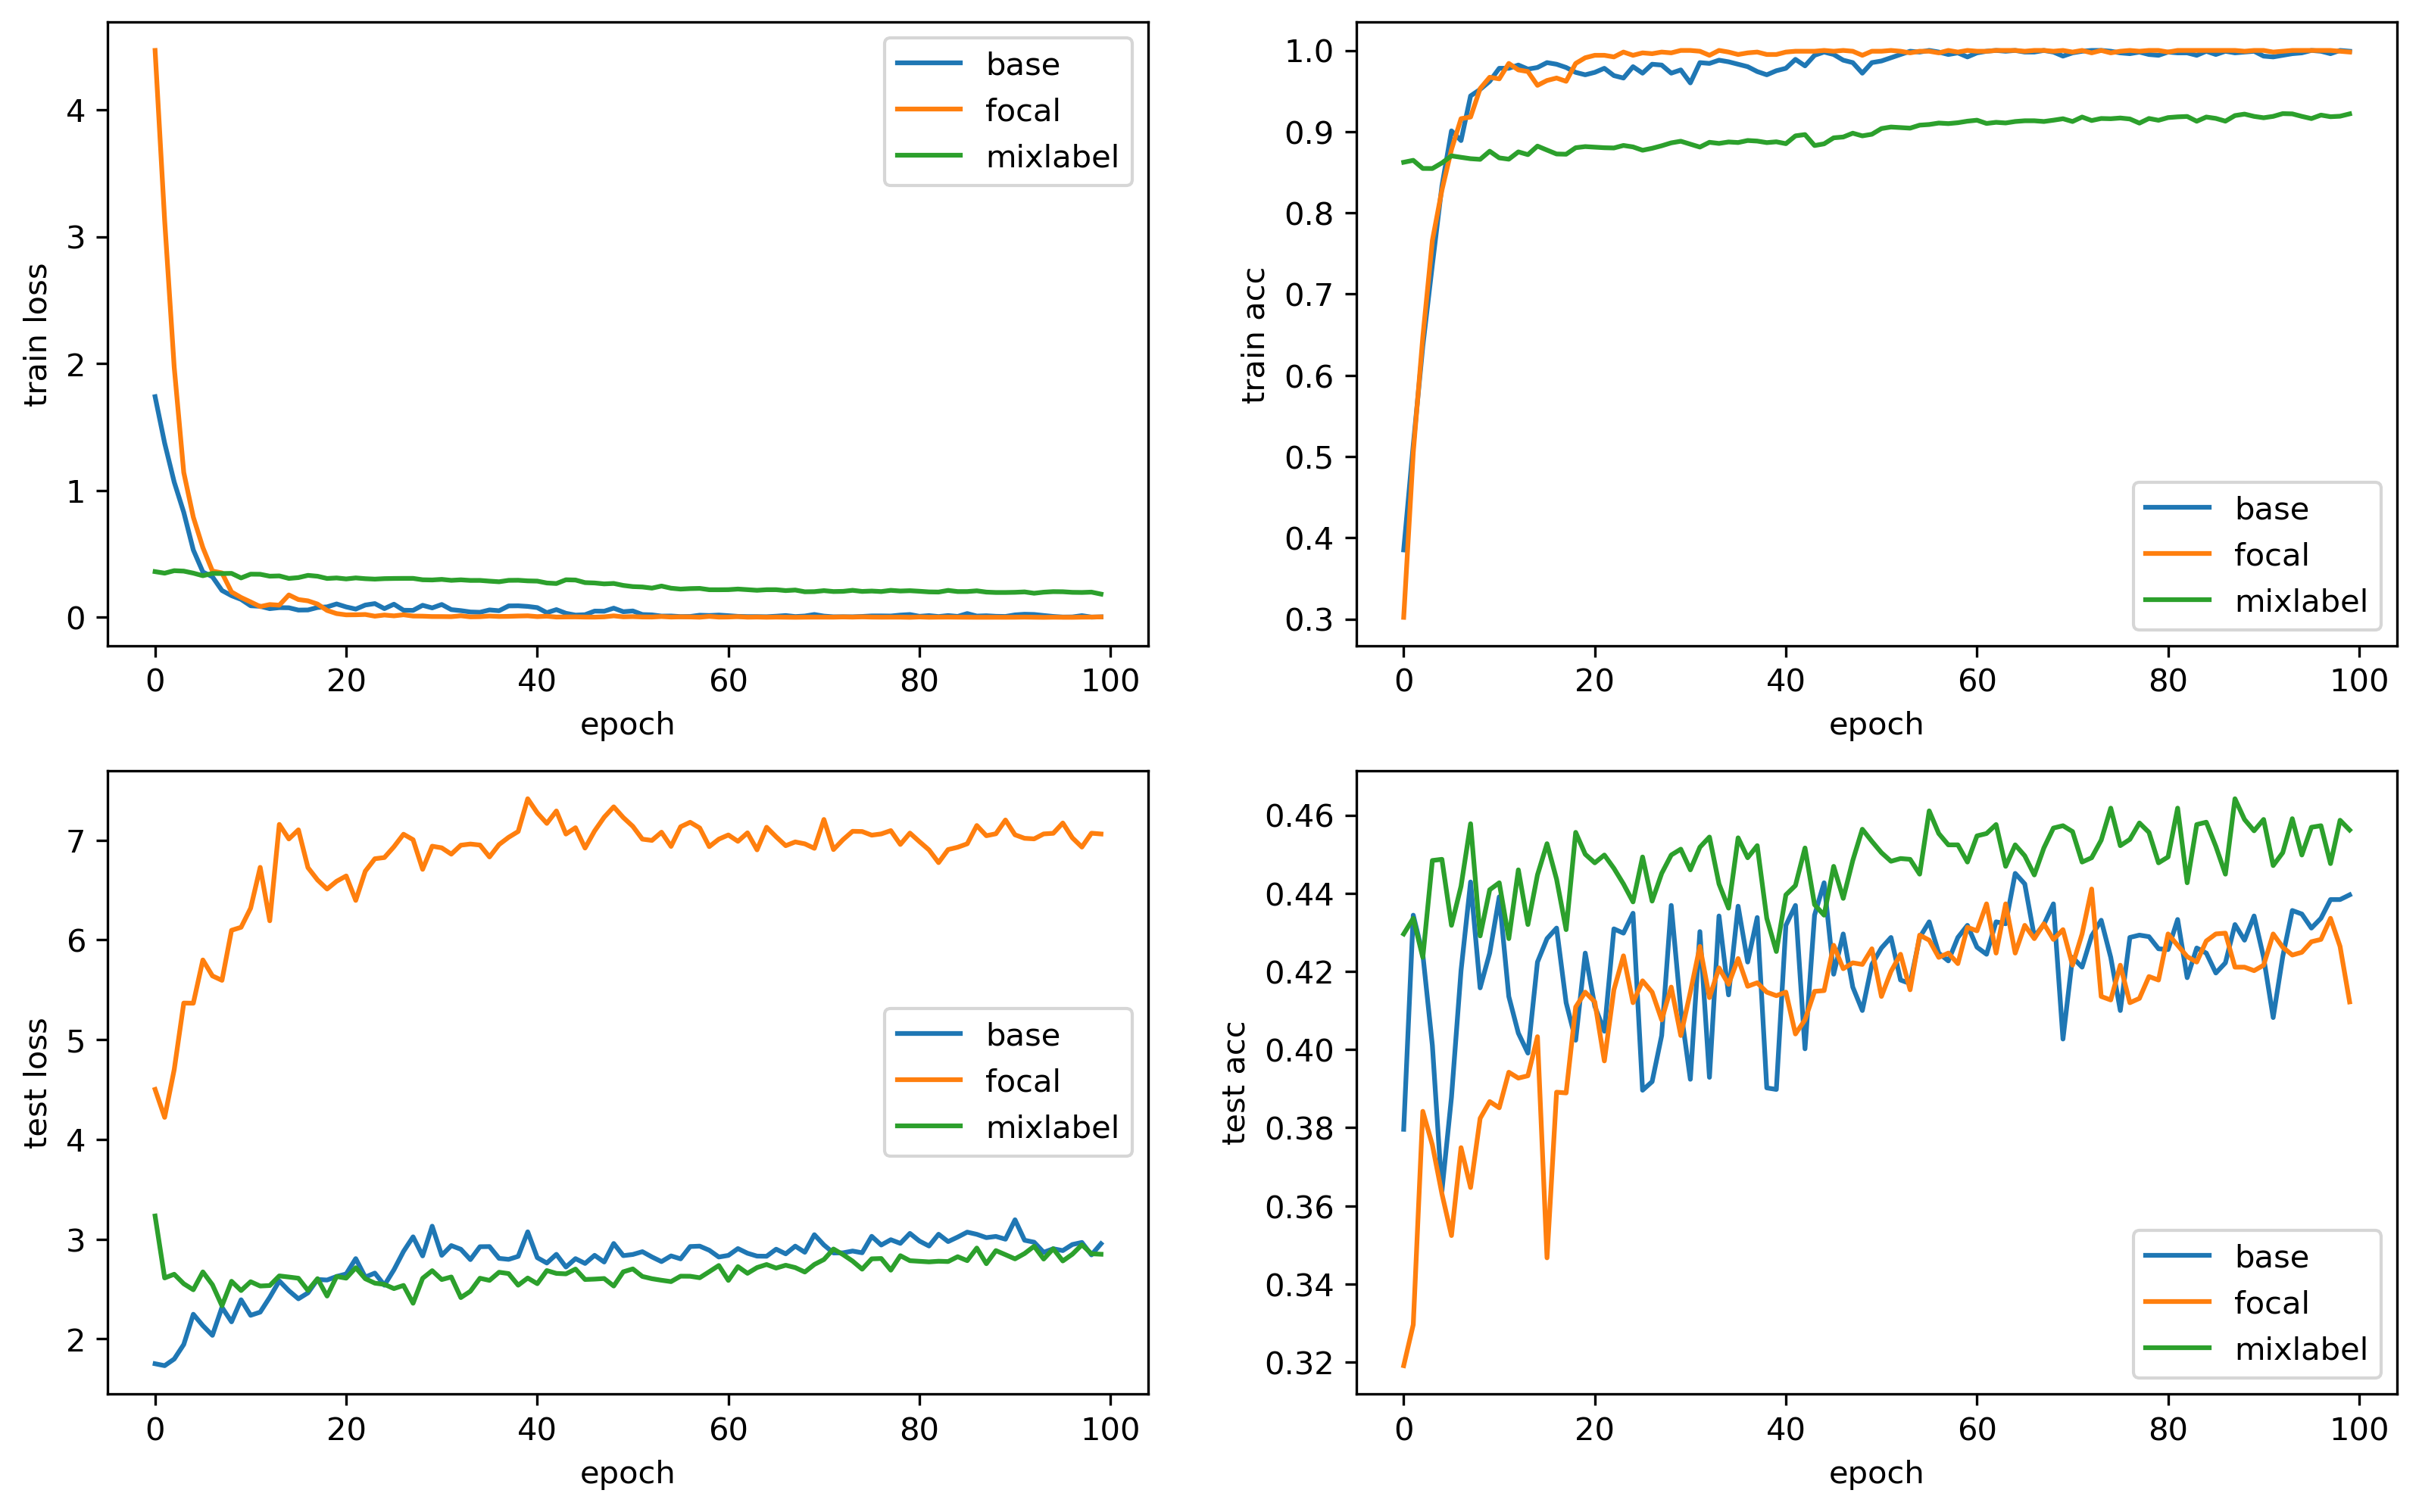

In [122]:
plot_result_compare(train_1k_label_log, train_1k_label_focalloss_log, train_1klabel_29k_unlabel_log)

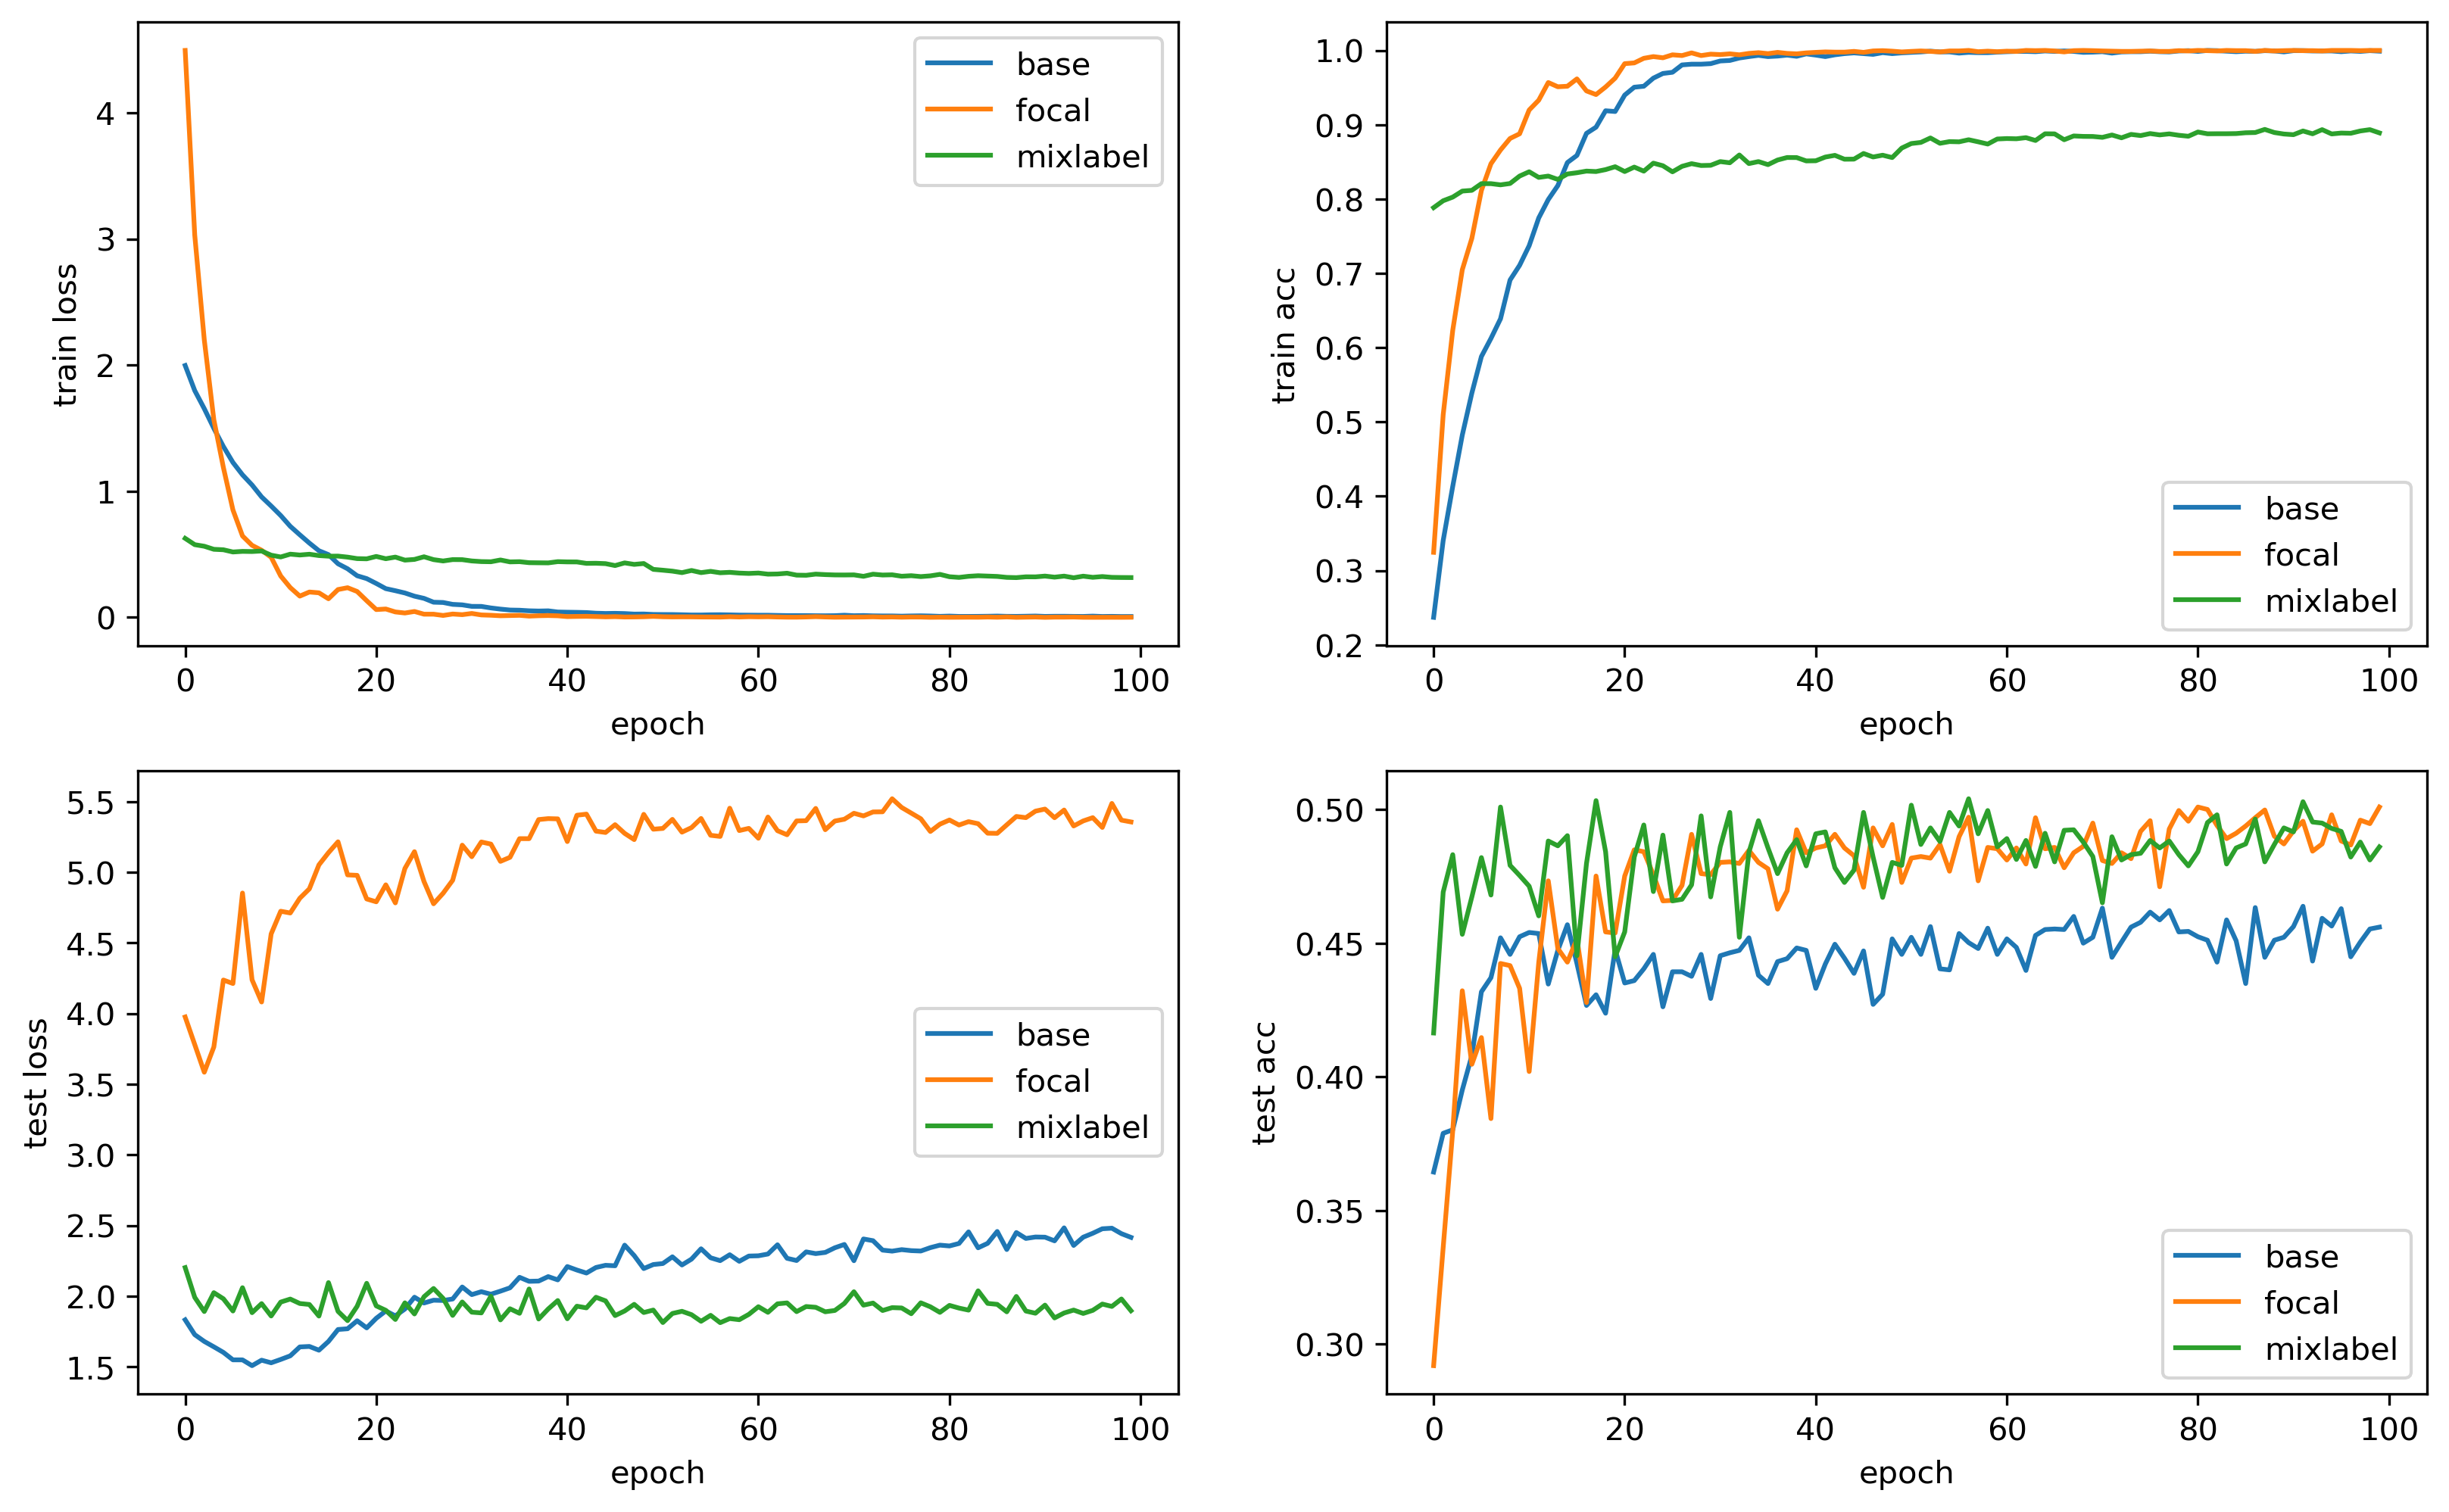

In [123]:
plot_result_compare(train_3klabel_log, train_3klabel_focalloss_log, train_3klabel_29kunlabel_log)

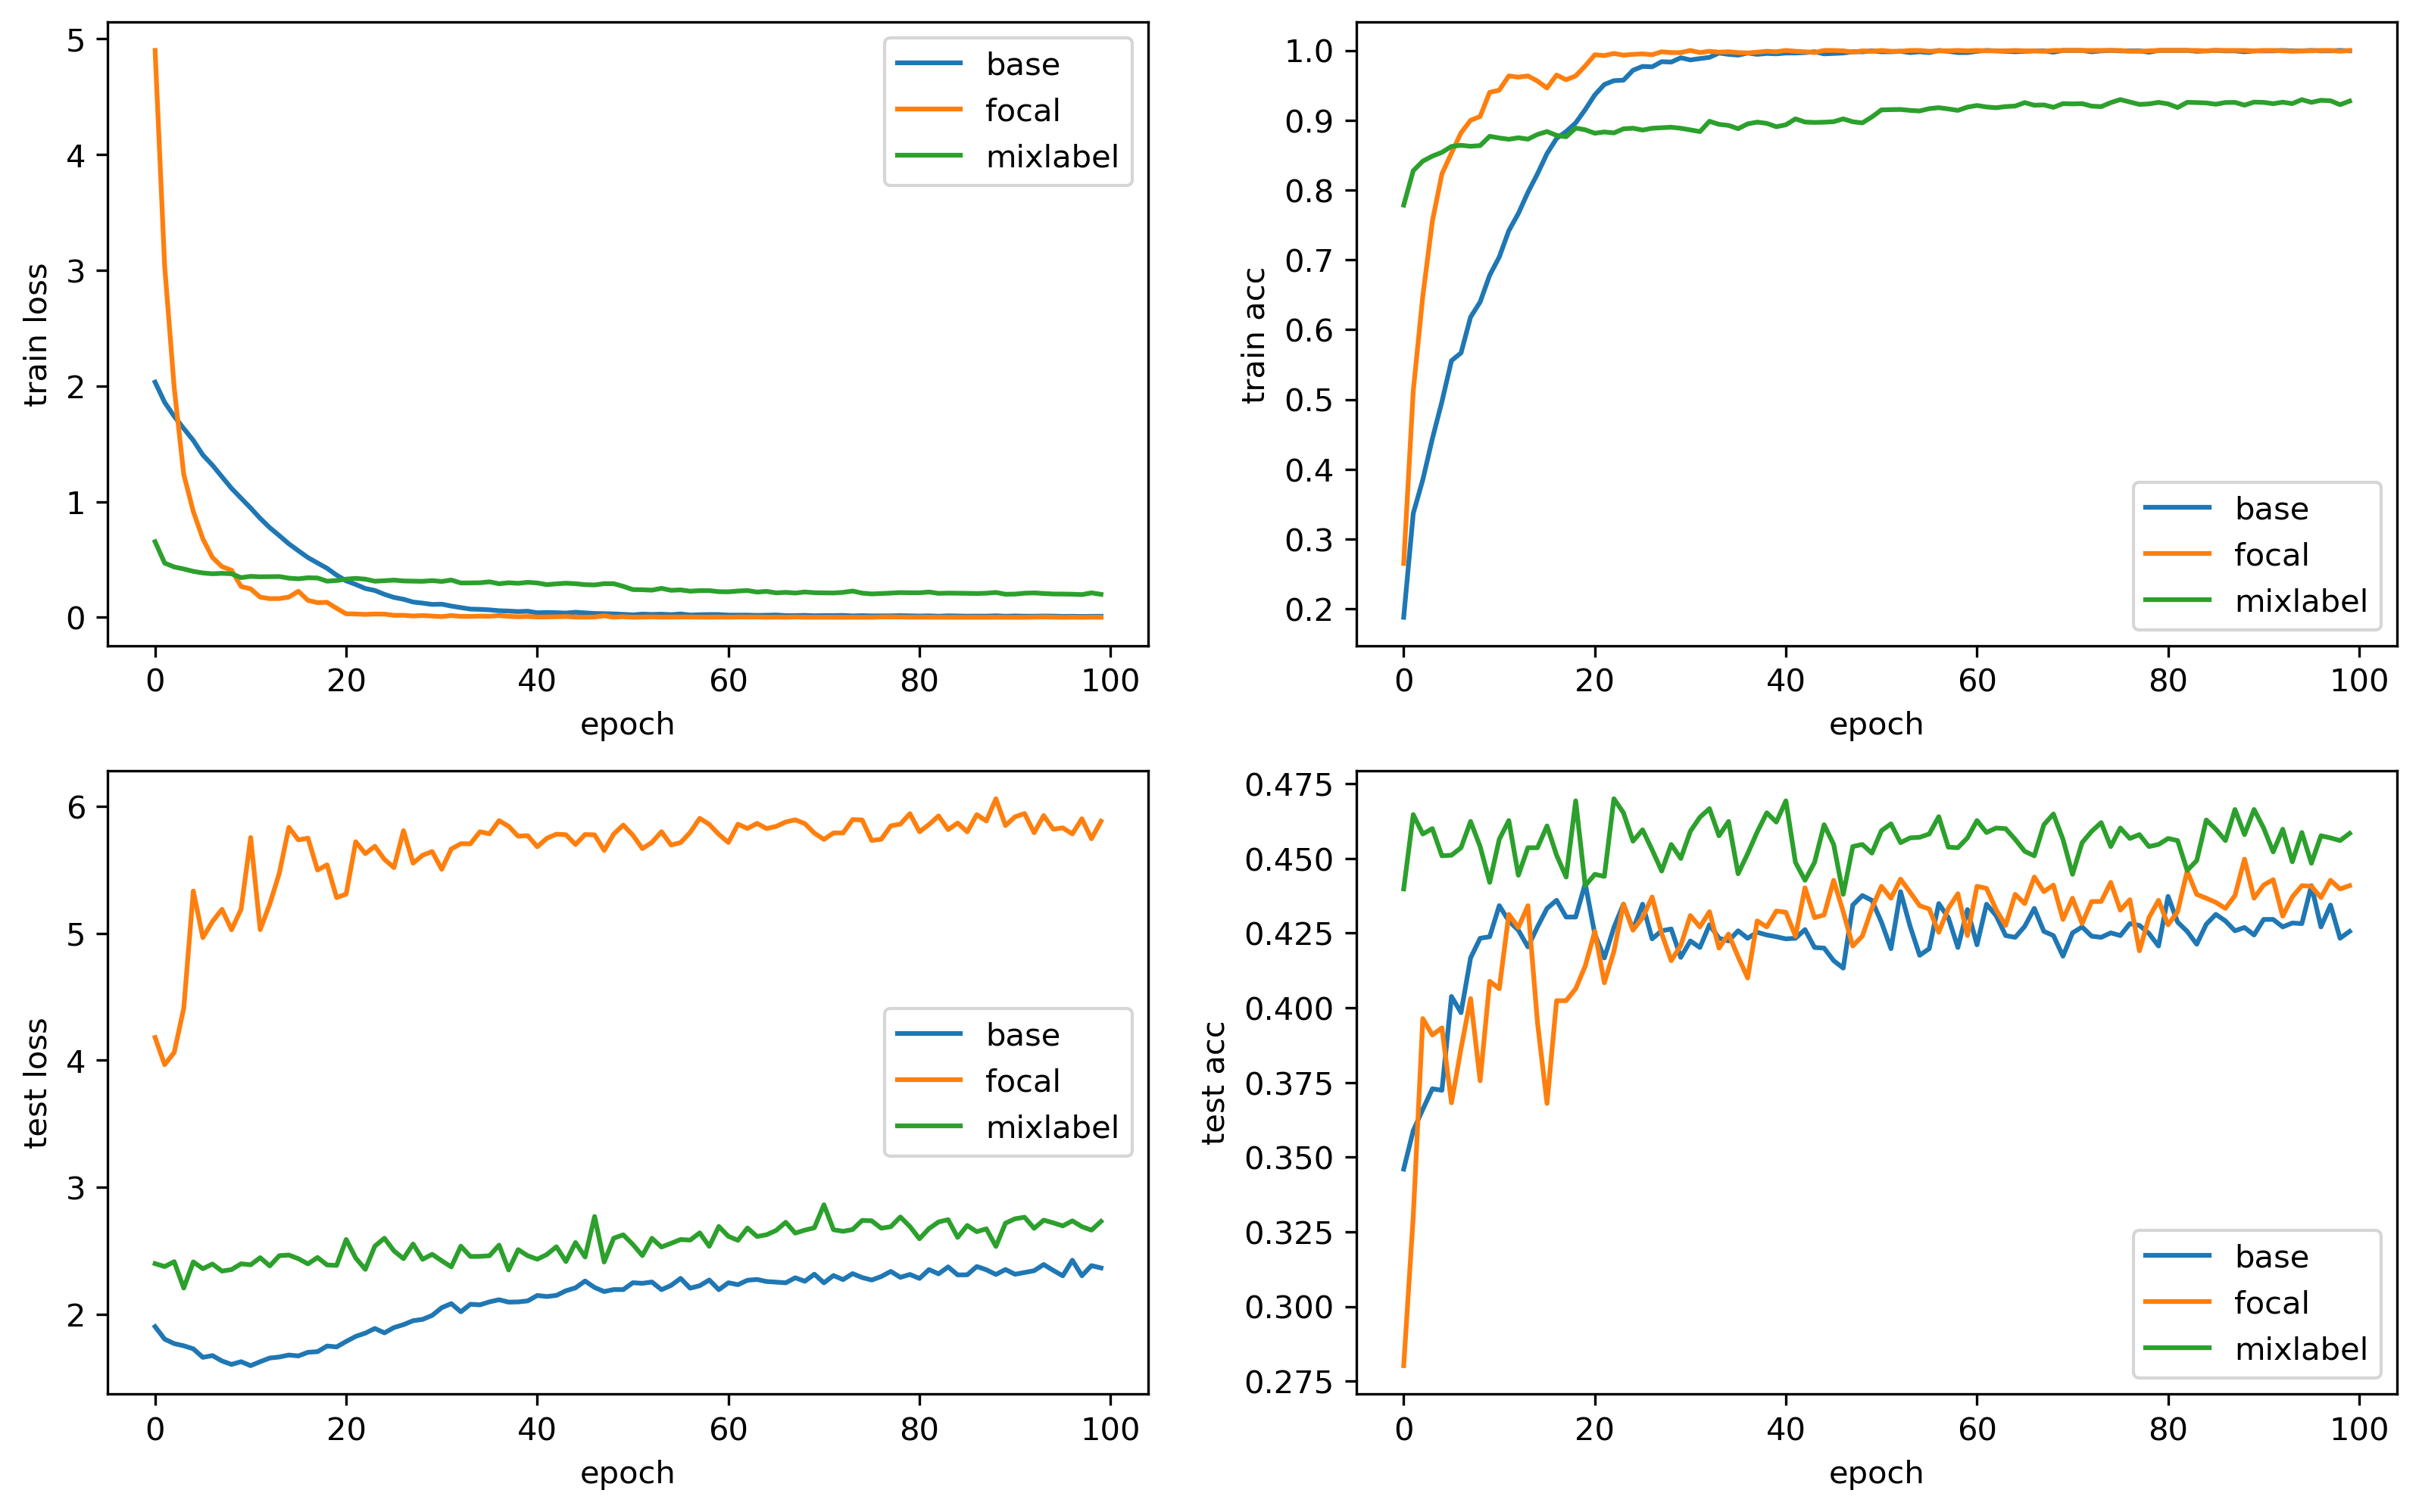

In [124]:
plot_result_compare(train_1k6_label_log, train_1k6label_focalloss_log, train_1k6label_29k_unlabel_log)

best train acc:100.00%, best test acc:44.16%


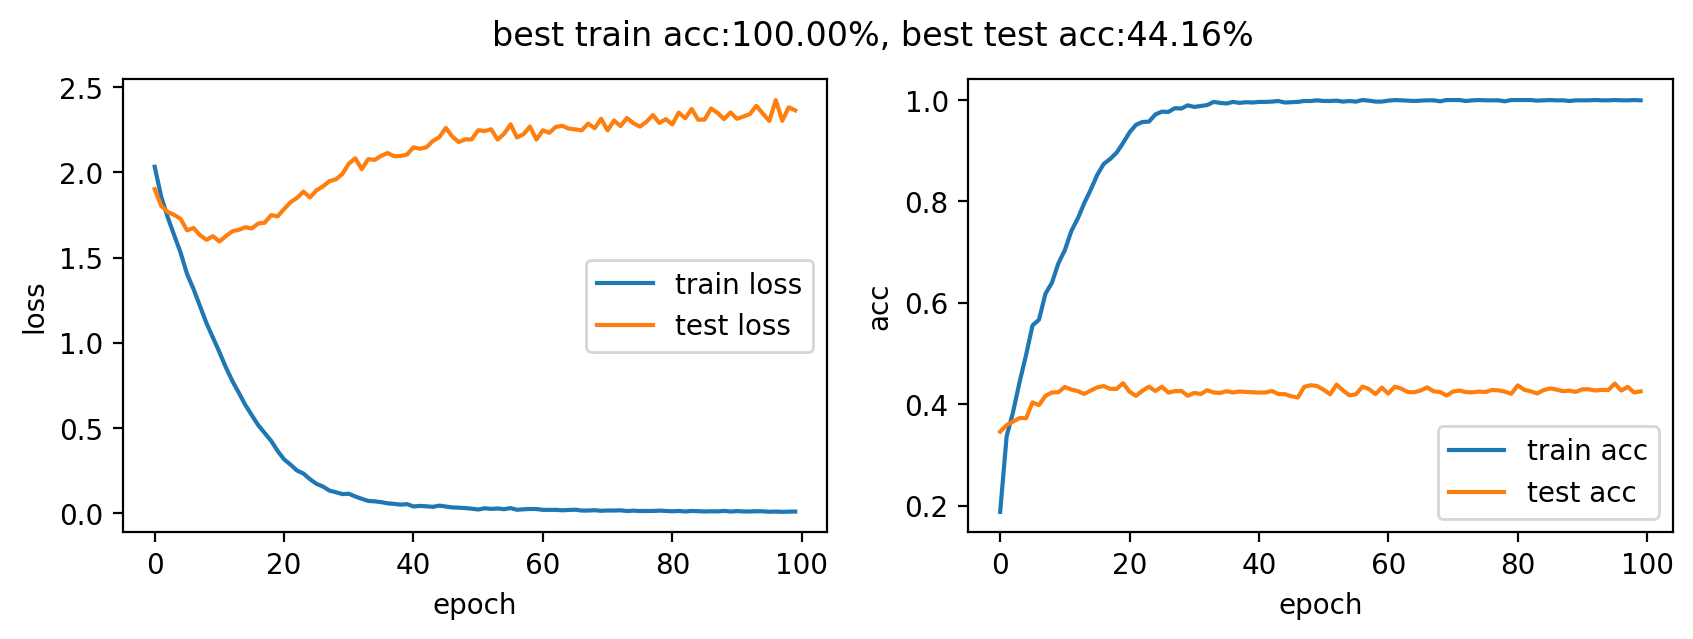

In [125]:
plot_result(train_1k6_label_log)

best train acc:100.00%, best test acc:44.98%


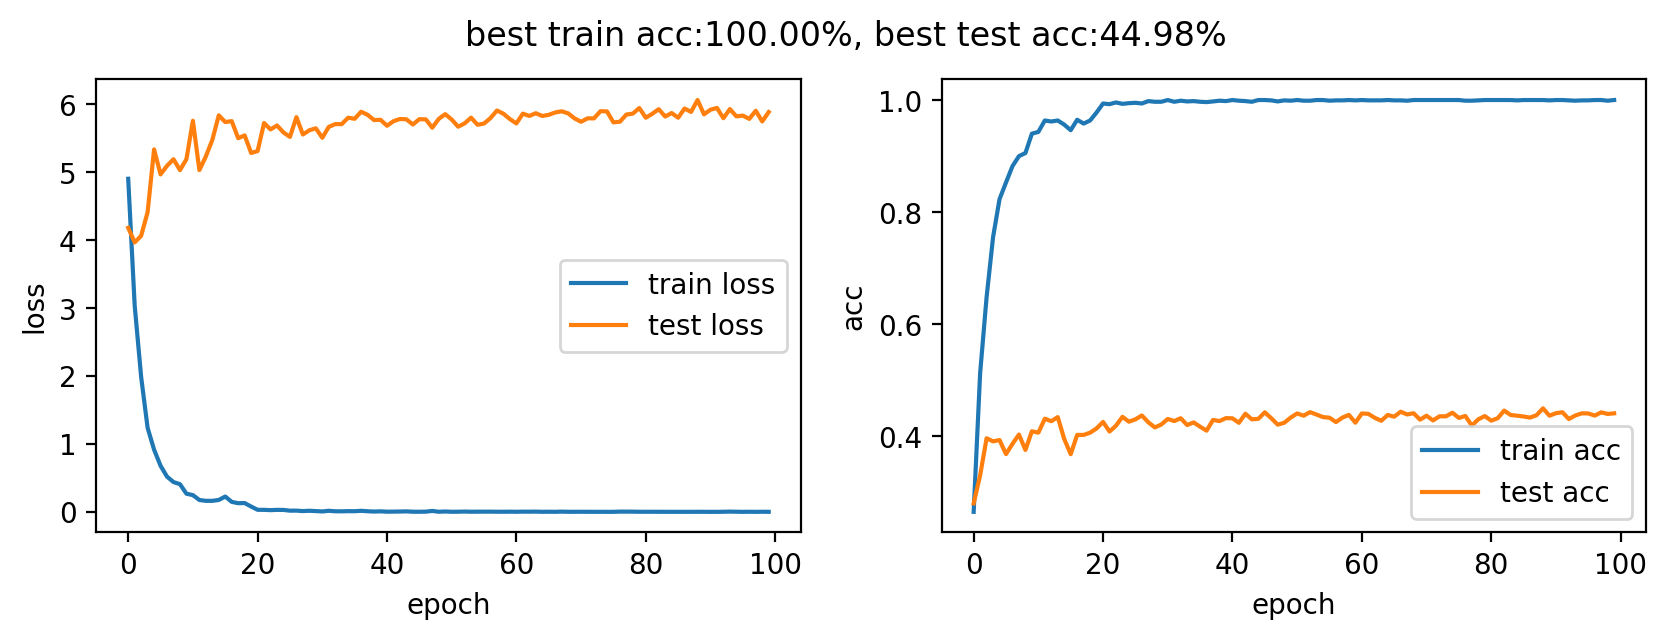

In [126]:
plot_result(train_1k6label_focalloss_log)

best train acc:92.96%, best test acc:47.00%


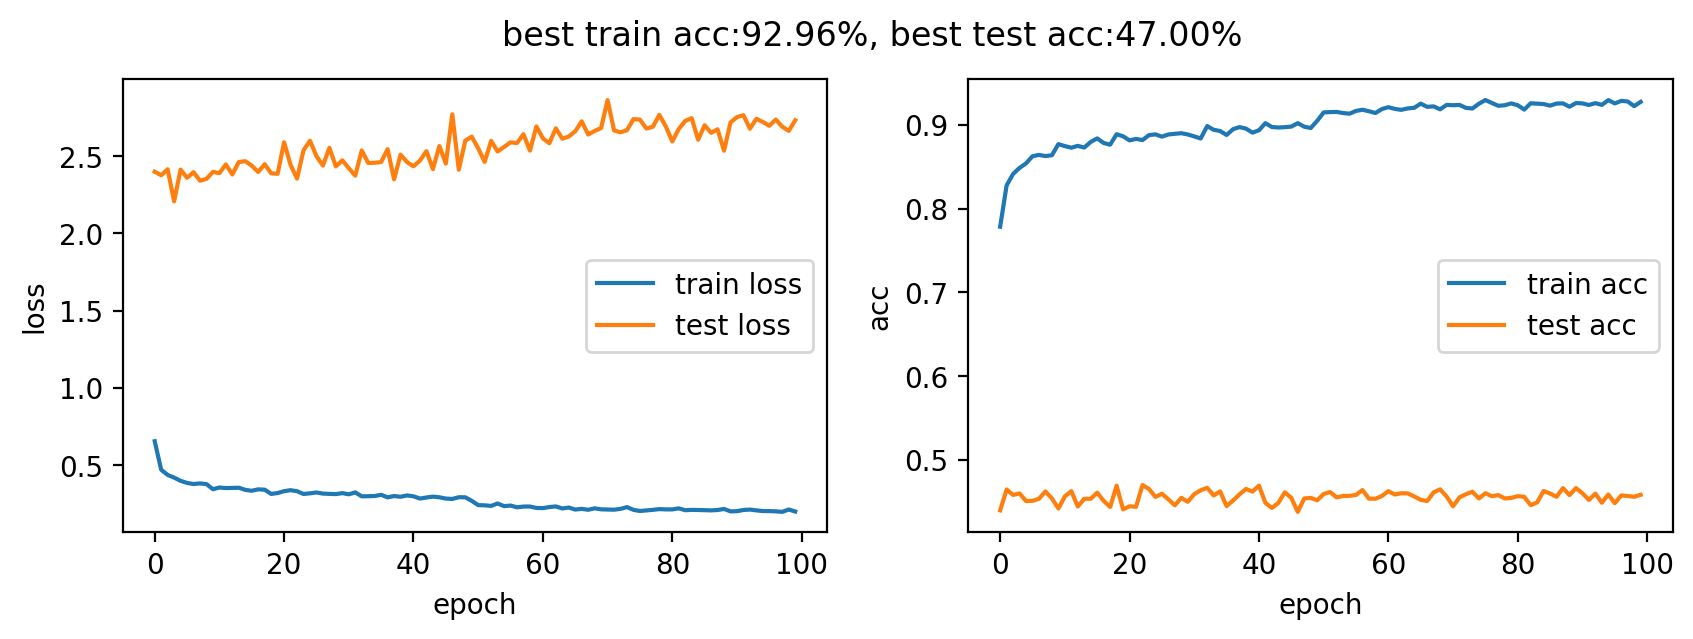

In [127]:
plot_result(train_1k6label_29k_unlabel_log)

best train acc:100.00%, best test acc:44.51%


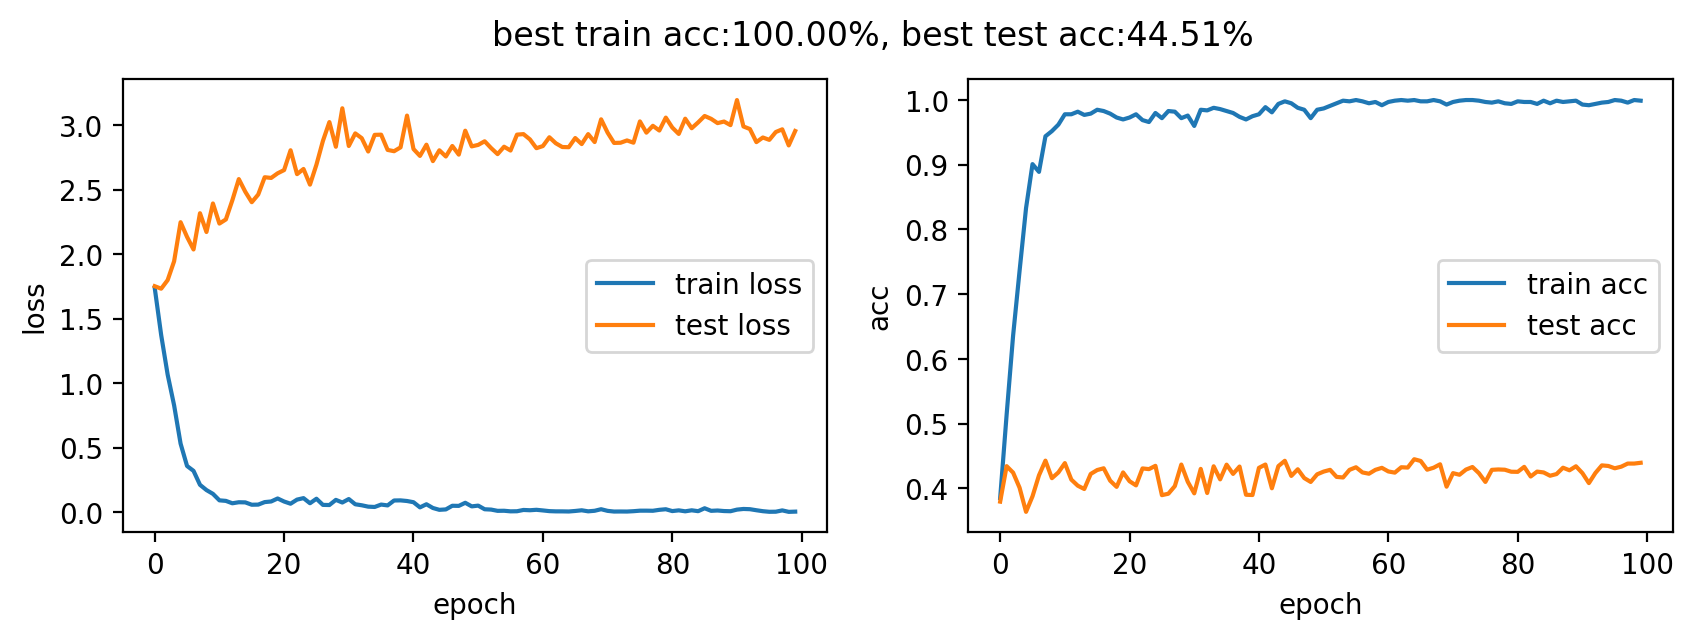

In [128]:
plot_result(train_1k_label_log)

best train acc:100.00%, best test acc:44.11%


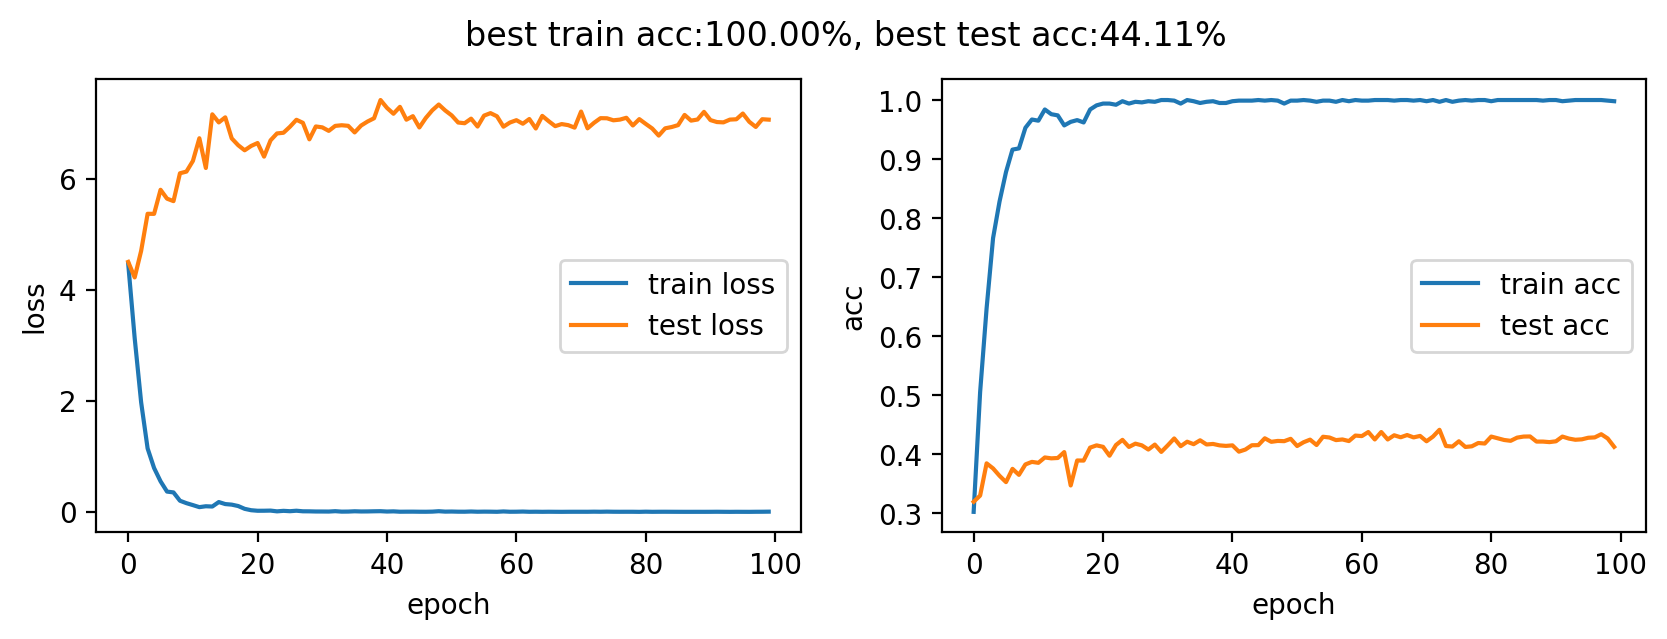

In [129]:
plot_result(train_1k_label_focalloss_log)

best train acc:92.22%, best test acc:46.42%


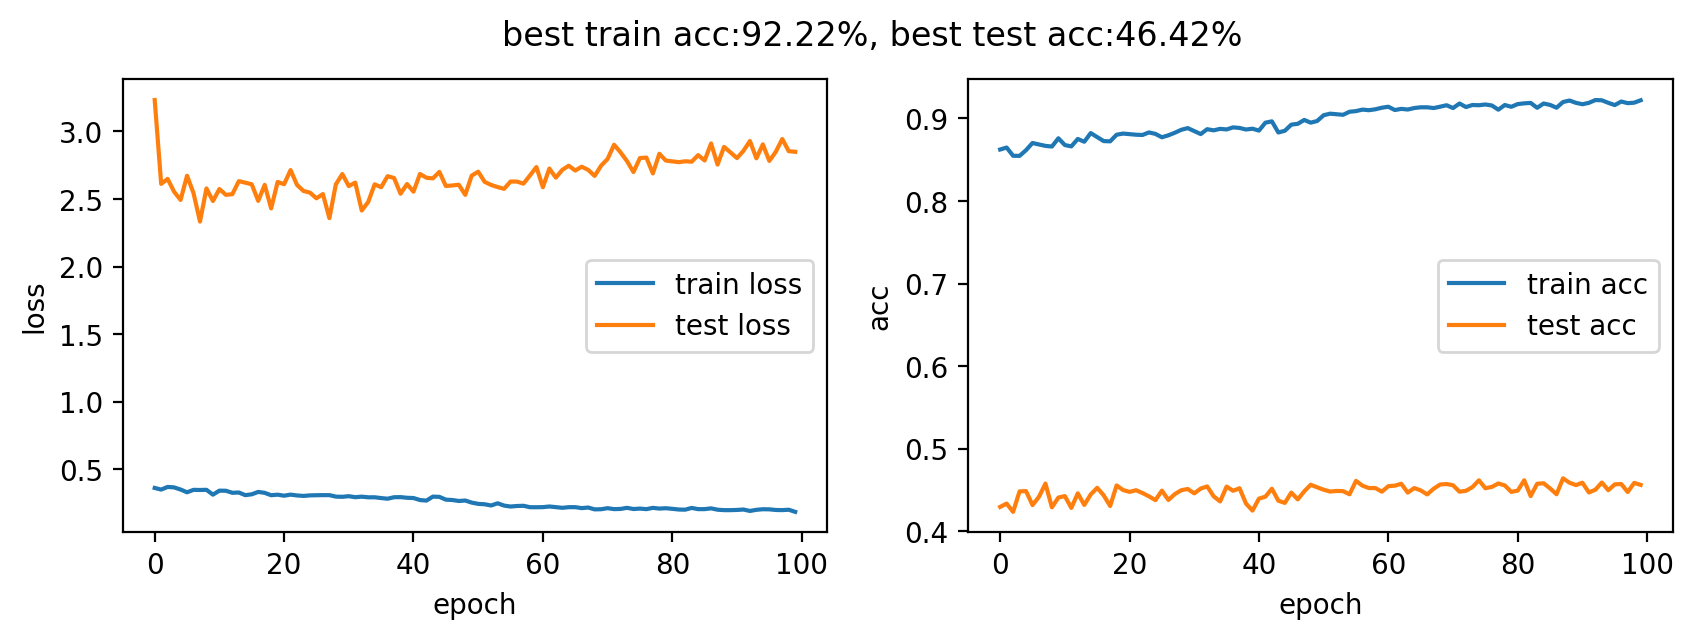

In [130]:
plot_result(train_1klabel_29k_unlabel_log)

best train acc:100.00%, best test acc:46.38%


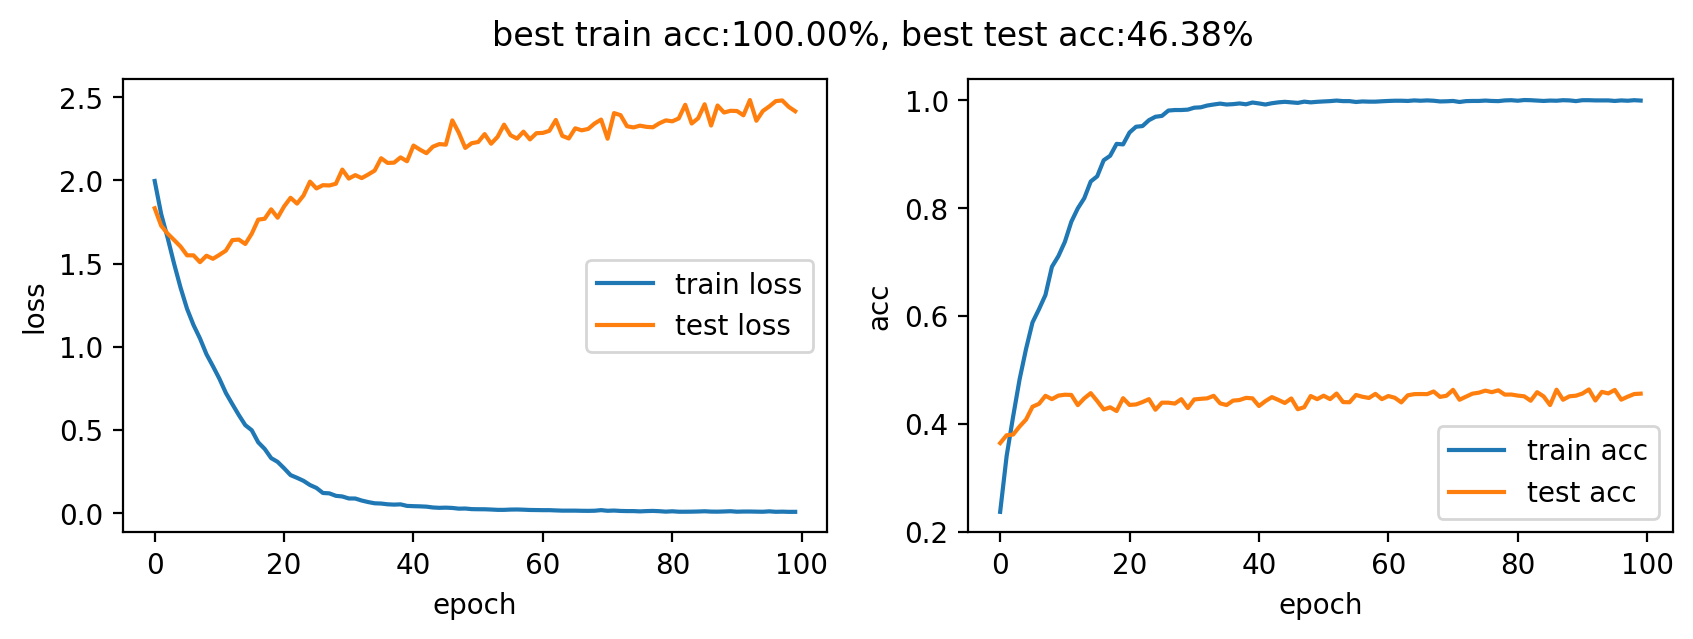

In [131]:
plot_result(train_3klabel_log)

best train acc:100.00%, best test acc:50.09%


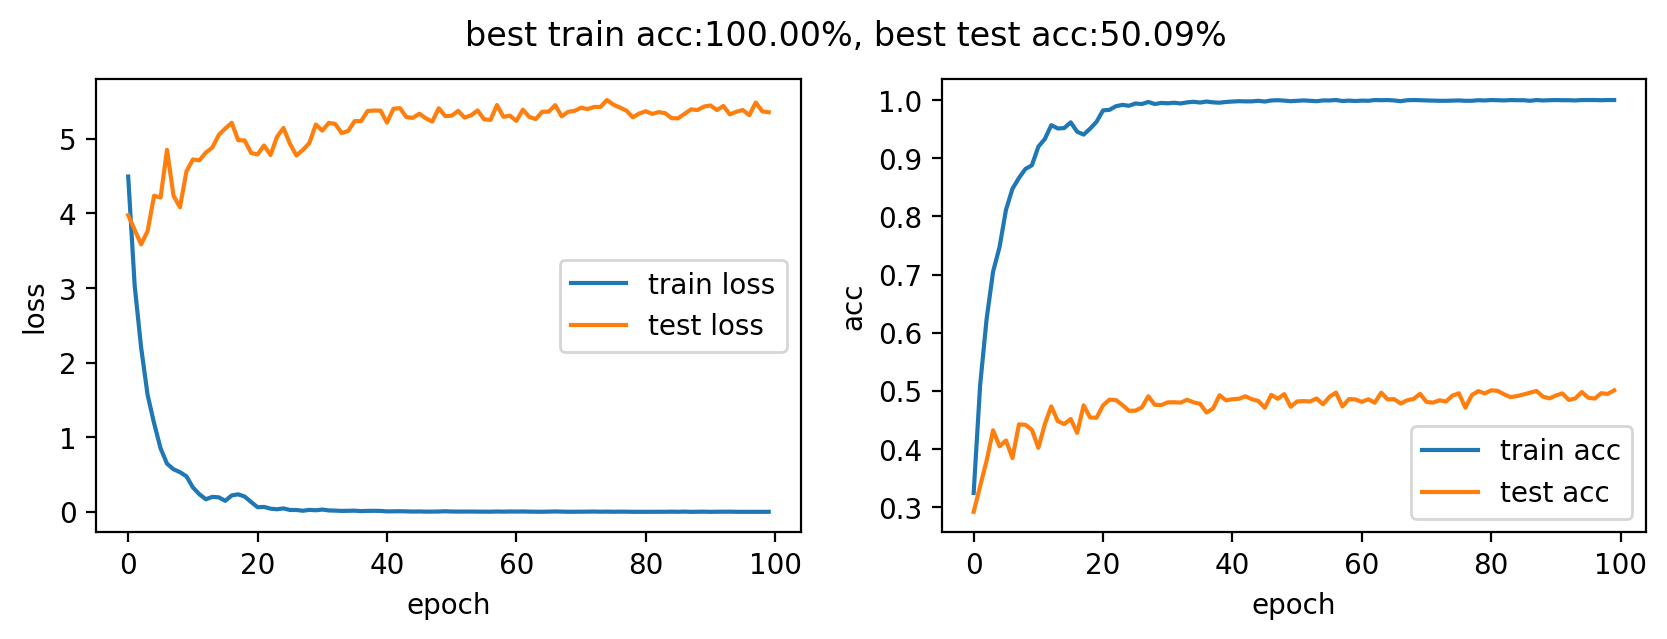

In [132]:
plot_result(train_3klabel_focalloss_log)

best train acc:89.37%, best test acc:50.40%


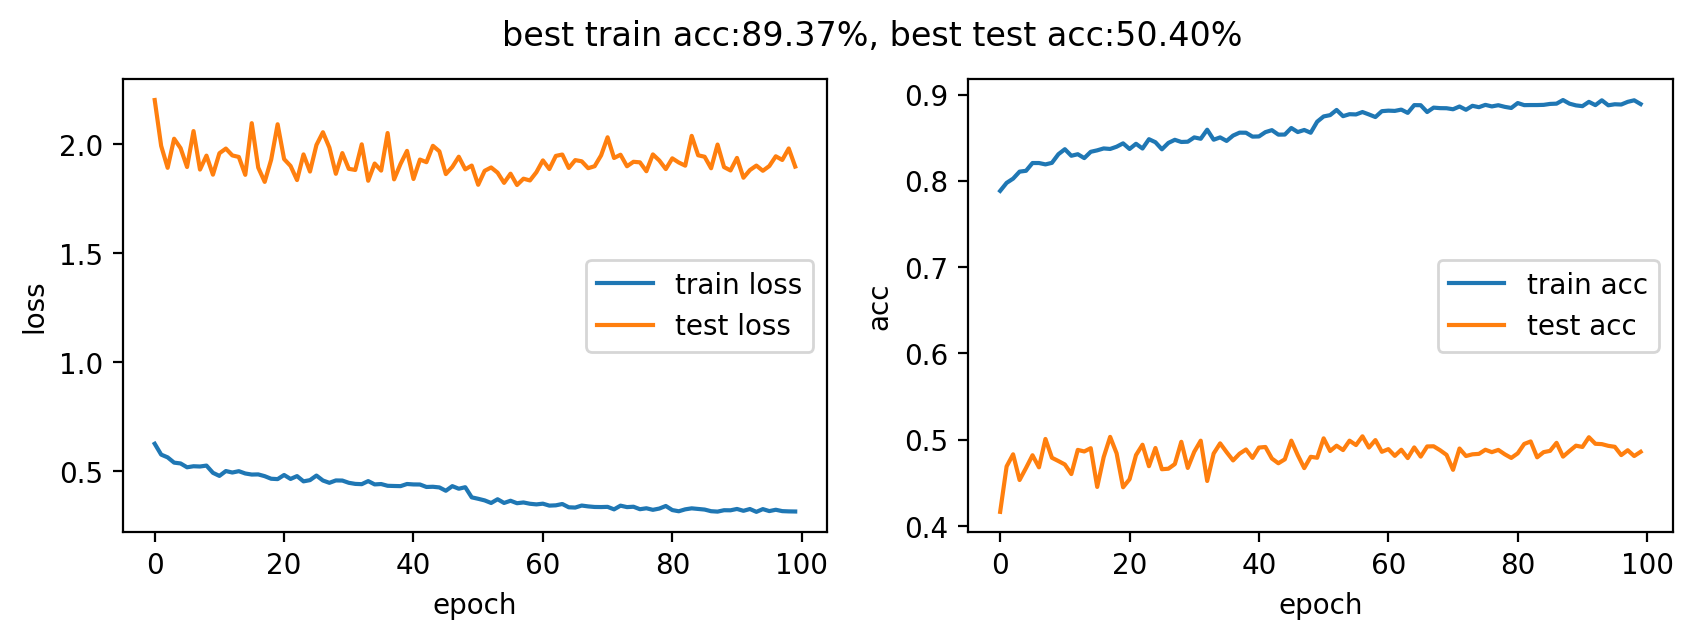

In [133]:
plot_result(train_3klabel_29kunlabel_log)